<a href="https://colab.research.google.com/github/Circle-vip/Yandex_practicum/blob/main/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B8%D0%B3%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ компьютерных игр

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Цель:** Выявить определяющие успешность игры закономерности. Определить потенциально популярный продукт.

**Описание данных:** Данные взяты за 2016 год. Могут быть неполными.

1) Name — название игры

2) Platform — платформа

3) Year_of_Release — год выпуска

4) Genre — жанр игры

5) NA_sales — продажи в Северной Америке (миллионы проданных копий)

6) EU_sales — продажи в Европе (миллионы проданных копий)

7) JP_sales — продажи в Японии (миллионы проданных копий)

8) Other_sales — продажи в других странах (миллионы проданных копий)

9) Critic_Score — оценка критиков (максимум 100)

10) User_Score — оценка пользователей (максимум 10)

11) Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Значение рейтингов:** 

1) Е - «Everyone» — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше.

2) M -«Mature» — «От 17 лет»: Материалы игры не подходят для подростков младше 17 лет. 

3) T - «Teen» — «Подросткам»: Игра подходит для лиц от 13 лет и старше.

4) E10+ - «Everyone 10 and older» — «Для всех старше 10 лет»: Возрастная категория — от 10 лет.

5) EC - «Early childhood» — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше.

6) K-A - «Kids to Adults» — «Для детей и взрослых»: Содержание игры вполне подходит для возрастной категории от 6 лет и старше.

7) AO - «Adults Only 18+» — «Только для взрослых»: Содержание игры только для взрослых от 18 лет.

8) RP - «Rating Pending»“ — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официального релиза.


## Обзор данных

In [ ]:
#Импортируем библиотеки, которые возможно понадобятся
import pandas as pd
import numpy as np
import warnings 
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Чтобы окна об ошибках не мешали
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Яндекс Практикум/Сборный проект №1/games.csv')
display(data.head())
data.info()
data.describe()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
#Пропуски
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Из первоначальных данных видно,  что надо:

- Привести названия столбцов к нижнему регистру.

- Разобраться в причинах пропусков и заменить их на значения

- Привести данные к нужным типам

## Предобработка данных

In [ ]:
#Привела название столбцов к нижнему регистру.
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [ ]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
#Проверяю на случай неявных дубликатов
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [ ]:
#Удалила строки с пропусками в name, genre, year_of_release, так как данных менее 2%  и без этих данных анализ провести невозможно.
data = data.dropna(subset = ['name', 'genre', 'year_of_release'])


In [ ]:
#Зменила пропуске в столбцах с оценками на значение-заглушку
data['critic_score'] = data['critic_score'].fillna(-111)
data['user_score'] = data['user_score'].fillna(-111)

In [ ]:
#Посмотрела  на распределине рейтингов
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Видно, что рейтинги EC, K-A, AO, RP  - совсем малый процент от общего числа, и сами эти рейтинги можно объединить с другими, так  как описание схожее.

In [ ]:
#Изменила значения рейтингов с помощью loc
data.loc[data['rating'] == 'AO', 'rating'] = 'M'
data.loc[data['rating'] == 'RP', 'rating'] = 'Unknown'
data.loc[data['rating'].isin(['EC', 'K-A']), 'rating'] = 'E'

In [ ]:
#Заменила пропуски на значение Unknown
data['rating'] = data['rating'].fillna('Unknown')

In [ ]:
data['rating'].value_counts()

Unknown    6677
E          3932
T          2905
M          1537
E10+       1393
Name: rating, dtype: int64

Теперь у нас 5  категорий рейтинга. 

- E - для всех возрастов

- Т - для подростков 13+

- М - для взрослых 17+

- E10+ - для всех старше 10

- Unknown - пропущено значение

In [ ]:
#Проверила на пропуски
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [ ]:
#Привела данных к корректному типу
data['year_of_release'] = data['year_of_release'].astype('int')

In [ ]:
len(data[data['user_score'] == 'tbd']) / len(data)

0.14449039163220628

tbd('To Be Determined') - оценка будет поставлена позже. По сути своей является пропуском. Поэтому заменю значением-заглушкой, как ранее.

In [ ]:
#Заменила tbd на значения-заглушки и привела к нужному типу.
data['user_score'] = data['user_score'].replace('tbd', -111)
data['user_score'] = data['user_score'].astype('float')

In [ ]:
#Добавила столбец с суммой продаж по всем регионам
data['sum_region_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_region_sales
11335,Blacksite: Area 51,PS3,2007,Shooter,0.07,0.01,0.00,0.01,56.0,6.3,T,0.09
16402,Moto Racer Advance,GBA,2002,Racing,0.01,0.00,0.00,0.00,86.0,-111.0,E,0.01
3938,Sonic Riders,PS2,2006,Racing,0.42,0.02,0.00,0.07,55.0,7.2,E,0.51
11751,Yoru no Nai Kuni,PSV,2015,Role-Playing,0.00,0.00,0.08,0.00,-111.0,-111.0,Unknown,0.08
12077,Dream Dance & Cheer,Wii,2009,Misc,0.06,0.00,0.00,0.00,-111.0,-111.0,Unknown,0.06


In [ ]:
#Проверила на дубликаты
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16444 non-null  object 
 1   platform          16444 non-null  object 
 2   year_of_release   16444 non-null  int64  
 3   genre             16444 non-null  object 
 4   na_sales          16444 non-null  float64
 5   eu_sales          16444 non-null  float64
 6   jp_sales          16444 non-null  float64
 7   other_sales       16444 non-null  float64
 8   critic_score      16444 non-null  float64
 9   user_score        16444 non-null  float64
 10  rating            16444 non-null  object 
 11  sum_region_sales  16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Вывод по предобработке:


- Удалила строки с пропусками в столбцах name, genre, year_of_release, т.к их около 1.6% от общих данных и их удаление не нанесет ущерба анализу в целом.

- Привела данные к нужным типам.

- Обнаружила пропуски в столбцах с оценками и рейтингом. Так как их очень много - удалять нельзя, но и восстановить или заменить на медианное значение тоже не представляется возможным. Поэтому приняла решение поставить значение-зашлушку(-111), т.к с ним легче будет фильтровать данные в будущем анализе.

- Дубликатов не обнаружено.

- Добавила столбец с суммой продаж по всем регионам.



## Исследовательский анализ данных.

### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

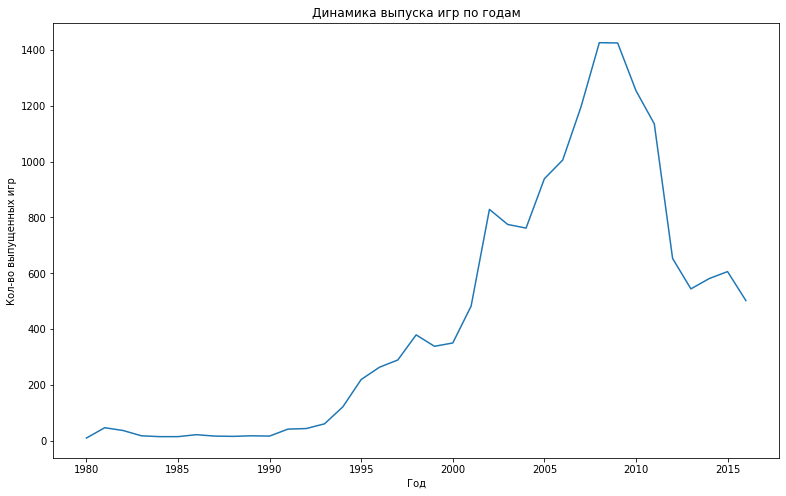

In [ ]:
year_sales = data.pivot_table(index = 'year_of_release', values = 'sum_region_sales', aggfunc = 'count')

plt.figure(figsize=(13,8))
(sns.lineplot(data = year_sales, x=year_sales.index, y='sum_region_sales')
    .set(title = 'Динамика выпуска игр по годам', xlabel = 'Год', ylabel = 'Кол-во выпущенных игр'))
plt.show()    

In [ ]:
data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

Из графика видно, что пик выпуска игр приходится на период с 2006 по 2011 года. 

### Как менялись продажи по платформам.

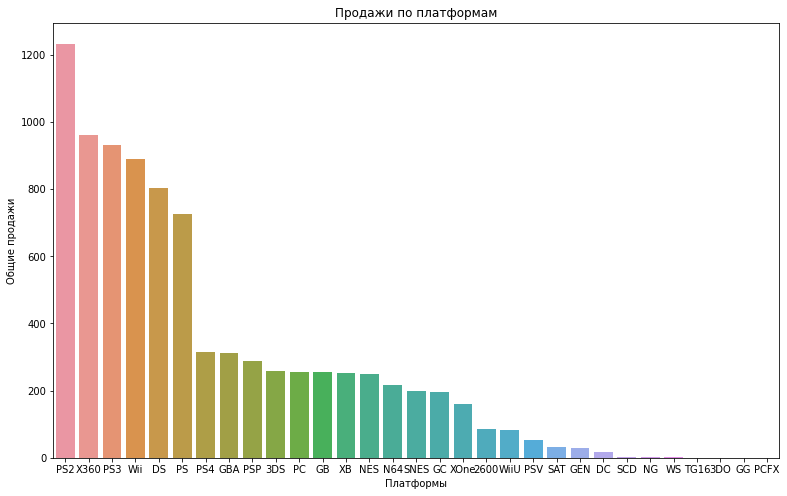

In [ ]:
platform_sales = (
    data
    .pivot_table(index='platform', values='sum_region_sales', aggfunc='sum')
    .sort_values('sum_region_sales', ascending=False)
)
plt.figure(figsize=(13,8))
(sns.barplot(data = platform_sales, x=platform_sales.index, y='sum_region_sales')
    .set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()    

Из гравика видно что лидерами являются 6 платформ: PS2, X360, PS3, Wii, DS, PS.

PS2


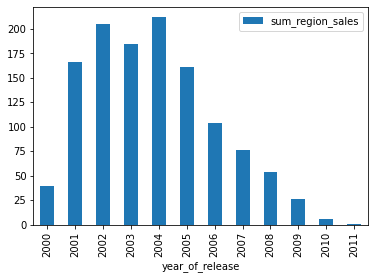

X360


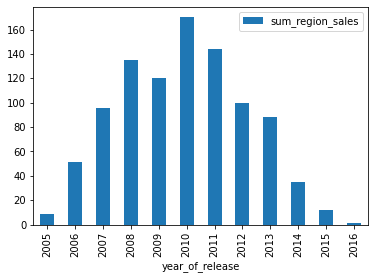

PS3


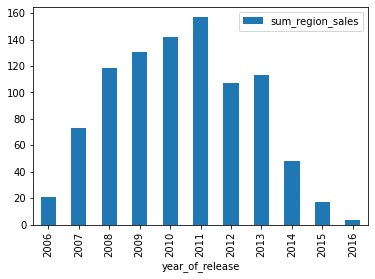

Wii


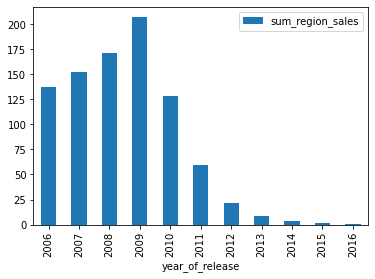

DS


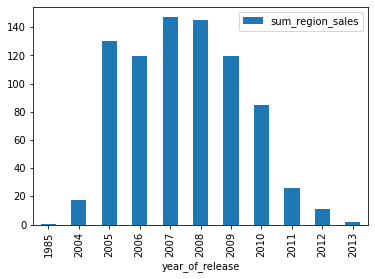

PS


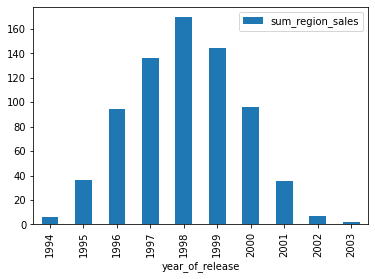

In [ ]:
for platform in platform_sales.index[:6]:
    print(platform)
    (data
    .query('platform == @platform')
    .pivot_table(index='year_of_release', values='sum_region_sales', aggfunc='sum')
    .plot(kind='bar')
)
    plt.show()

PS: Пик продаж - 1996-2000; Спад - с 2001

PS2: Пик продаж - 2001-2005; Спад - с 2006

PS3: Пик продаж - 2007-2013; Спад - с 2014

Х360: Пик продаж - 2007-2013; Спад - с 2014

Wii: Пик продаж - 2006-2009; Спад - с 2010

DS: Пик продаж - 2005-2009; Спад - с 2010

Построив графики для лидирующих платформ по продажам, я увидела, что популярность платформ Wii, Ds, PS2  сошла к минимуму к 2011 году. У платформ Х360 и PS3 наоборт - на 2011 пришелся пик продаж и спад  произошел начиная с 2014. Платформы меняют на новые примерно каждые 3-5 лет. Все 6 платформ не являются показательными к актуальному для нас периоду - 2014/2016гг, т.е последние 3 года. 

In [ ]:
#Актуальный период:
new_data = data.query('year_of_release >=2014')

### Какие платформы лидируют по продажам, растут или падают?

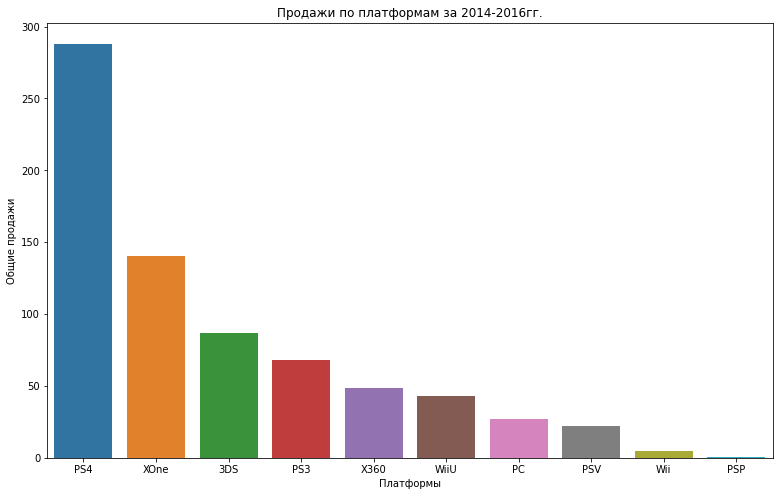

In [ ]:
new_platform_sales = (
    new_data
    .pivot_table(index='platform', values='sum_region_sales', aggfunc='sum')
    .sort_values('sum_region_sales', ascending=False)
)
plt.figure(figsize=(13,8))
(sns.barplot(data = new_platform_sales, x=new_platform_sales.index, y='sum_region_sales')
    .set(title = 'Продажи по платформам за 2014-2016гг.', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

PS4


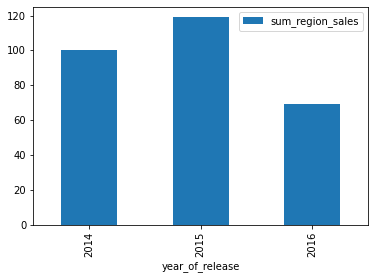

XOne


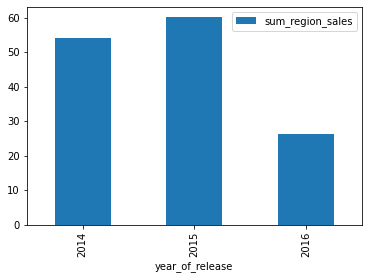

3DS


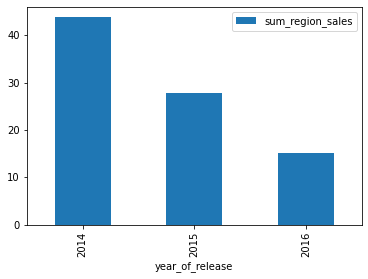

PS3


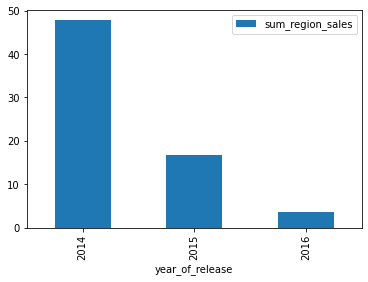

X360


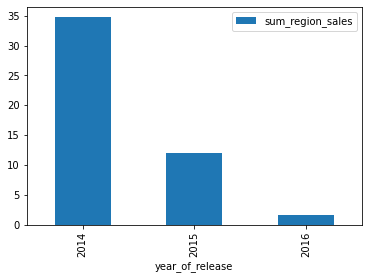

WiiU


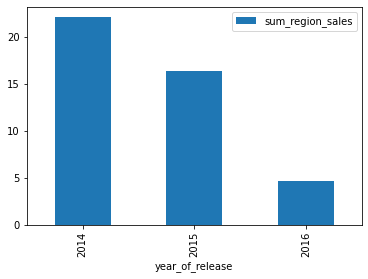

PC


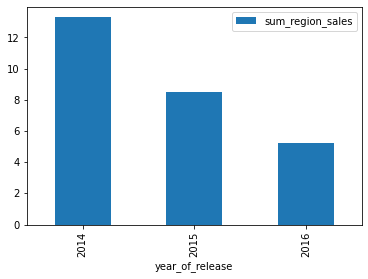

PSV


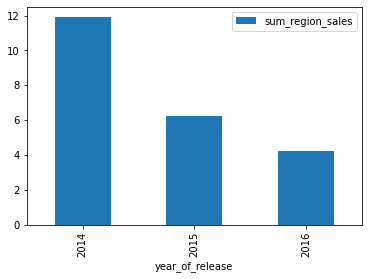

Wii


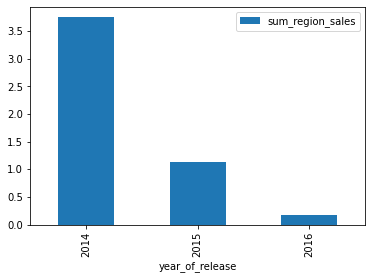

PSP


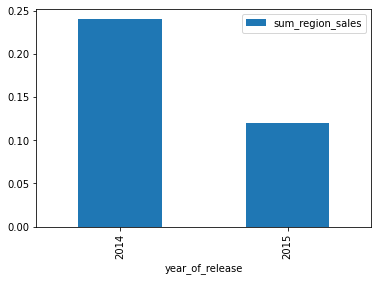

In [ ]:
for platform in new_platform_sales.index:
    print(platform)
    (new_data
    .query('platform == @platform')
    .pivot_table(index='year_of_release', values='sum_region_sales', aggfunc='sum')
    .plot(kind='bar')
)
    plt.show()

Из графиков видно, что наиболее прибыльная платформа за последние 3 года - PS4. Так же в лидеры можно включить XOne и 3DS. При этом, у PS4 и XOne наблюдается пик продаж в 2015 году и, т.к данные за 2016 год могут быть неполными, нельзя с уверенностью утверждать, что спад в 2016 году был такой резкий и был ли он вообще. У платформ Wii, X360, PS3 наблюдается сильный спад с 2015 года.  То есть, для анализа лучше взять платформы, у которых спад меньше, чем на 50% в 2015 году.
Итак, платформы, которые берем для анализа:
- PS4

- XOne

- 3DS

- WiiU

- PC

- PSV

In [ ]:
#Срез данных по выбранным платформам за актуальный период.
new_data = new_data.query('platform != ["Wii", "X360", "PS3", "PSP"]')
new_data.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_region_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-111.0,-111.0,Unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [ ]:
new_data['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PC', 'PSV'], dtype=object)

###  График «ящик с усами» по глобальным продажам игр в разбивке по платформам.

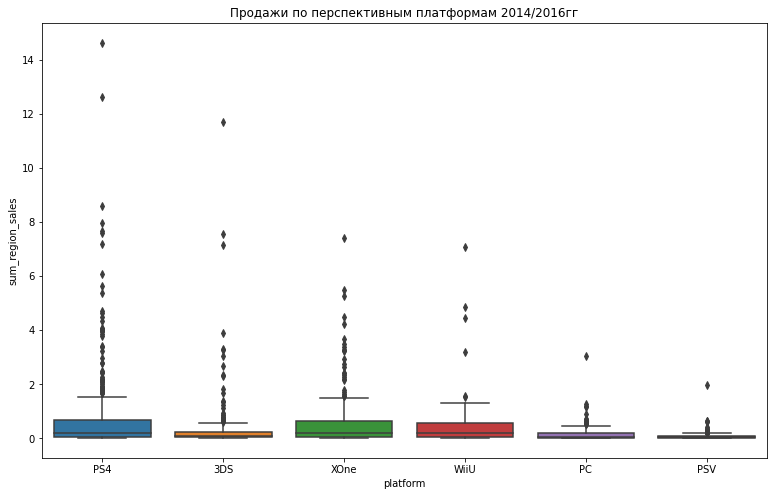

In [ ]:
plt.figure(figsize=(13,8))
(sns.boxplot(data=new_data, x = 'platform', y = 'sum_region_sales')
    .set(title='Продажи по перспективным платформам 2014/2016гг'))
plt.show() 

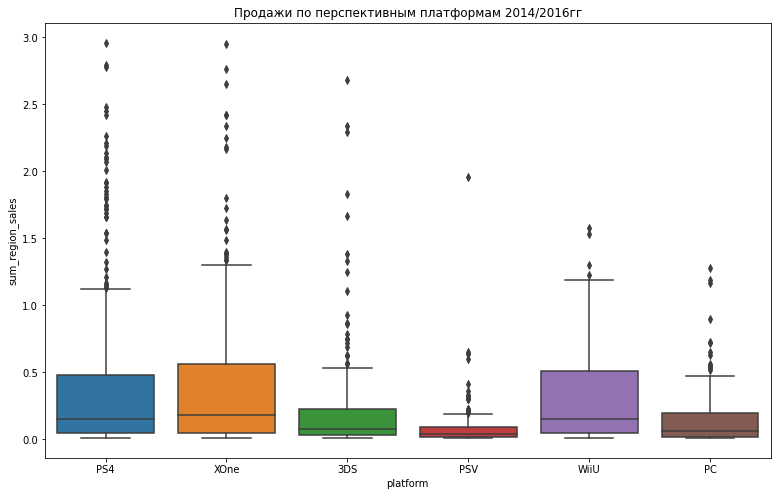

In [ ]:
#Убрала выбросы и нулевые значения, чтобы получше разглядеть диаграммы:
new_data_filtered = new_data.query('0 < sum_region_sales <= 3')

plt.figure(figsize=(13,8))
(sns.boxplot(data=new_data_filtered, x = 'platform', y = 'sum_region_sales')
    .set(title='Продажи по перспективным платформам 2014/2016гг'))
plt.show() 

**ВЫВОД:** Из диаграмм видно, что медианное значение у всех платформ находится в промежутке от 0.1 до 0.25 млн проданных копий. Наблюдается очень много выбросов. Убрала значения больше 3 во втором графике,потому что макс.значение не превышает 1.5 и считаю, что, если в данном случае взять значение, в два раза превосходящее максимальное, может адкватно изменить данные, сильно их не искажая, но помогая лучше прочитать диаграммы. У платформ PS4, XOne, WiiU самые высокие максимальные значения, почти на одном уровне - от 1.0 до 1.5.  У платформы 3DS небольшой межквартильный размах и максимальное значение, однако  есть крупные выбросы, которые можно отдельно проанализировать. В итоге, самыми прибыльными платформами я считаю эти четыре - PS4, XOne, 3DS, WiiU.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

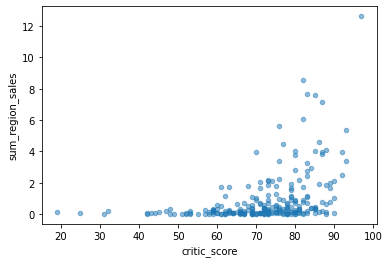

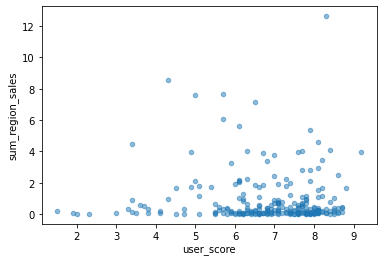

In [ ]:
#Выбрала, в качестве популярной платформы, PS4:
ps4 = new_data.query('platform == "PS4"')
    
ps4[ps4['critic_score'] != -111].plot(kind='scatter', x = 'critic_score', y='sum_region_sales', alpha=0.5)
ps4[ps4['user_score'] != -111].plot(kind='scatter', x = 'user_score', y='sum_region_sales', alpha=0.5)

In [ ]:
display(ps4[(ps4['critic_score'] != -111) & (ps4['user_score'] != -111)][['critic_score', 'user_score', 'sum_region_sales']].corr()['sum_region_sales'])

critic_score        0.401903
user_score         -0.043186
sum_region_sales    1.000000
Name: sum_region_sales, dtype: float64

**Вывод:** между оценками пользователей и продажами корреляции практически нет. Но есть заметная, хоть и слабая, корреляция между оценками критиков и продажами. Это говорит о том, что пользователи, хоть и не в большинстве своем, но прислушиваются к мнениям критиков и экспертов. Тут было бы полезно провести более глубокий анализ, на наличие нелинейных связей. Возможно это касается определенного региона/жанра/рейтинга.

________________________________________
3DS


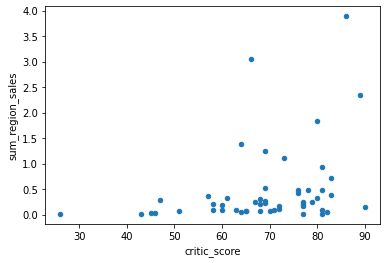

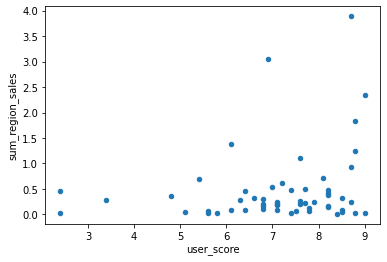

critic_score        0.284686
user_score          0.279850
sum_region_sales    1.000000
Name: sum_region_sales, dtype: float64
________________________________________
PC


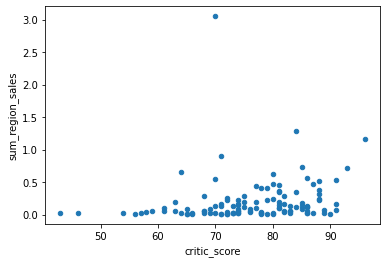

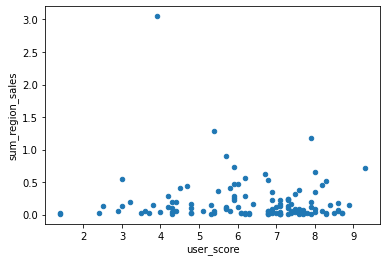

critic_score        0.172061
user_score         -0.089974
sum_region_sales    1.000000
Name: sum_region_sales, dtype: float64
________________________________________
PS4


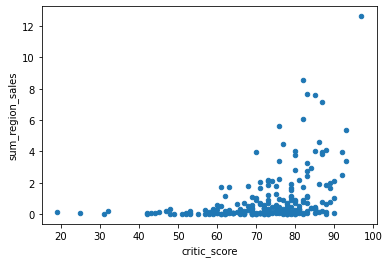

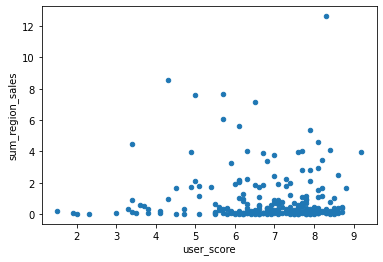

critic_score        0.401903
user_score         -0.043186
sum_region_sales    1.000000
Name: sum_region_sales, dtype: float64
________________________________________
PSV


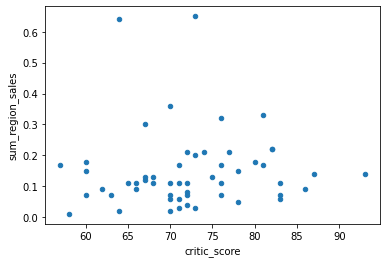

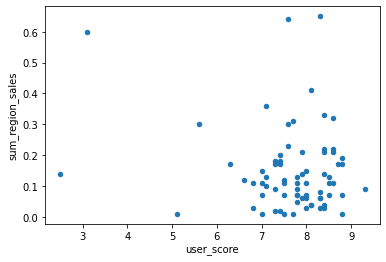

critic_score        0.041029
user_score          0.023528
sum_region_sales    1.000000
Name: sum_region_sales, dtype: float64
________________________________________
WiiU


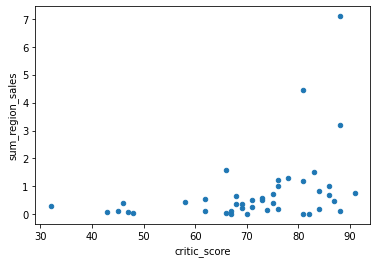

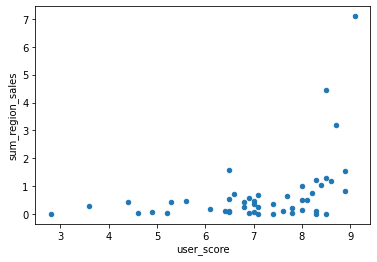

critic_score        0.375640
user_score          0.411451
sum_region_sales    1.000000
Name: sum_region_sales, dtype: float64
________________________________________
XOne


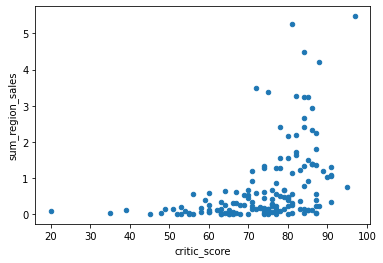

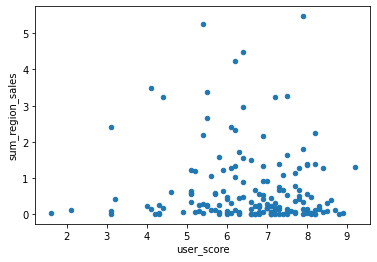

critic_score        0.422112
user_score         -0.091734
sum_region_sales    1.000000
Name: sum_region_sales, dtype: float64


In [ ]:
#Функция для просмотра корреляции на других платформах:
for platform, games in new_data.groupby('platform'):
    print('_'*40)
    print(platform)
    games[games['critic_score'] != -111].plot(kind='scatter', x = 'critic_score', y='sum_region_sales')
    games[games['user_score'] != -111].plot(kind='scatter', x = 'user_score', y='sum_region_sales')
    plt.show()
    print(games[(games['critic_score'] != -111) & (games['user_score'] != -111)][['critic_score', 'user_score', 'sum_region_sales']].corr()['sum_region_sales'])

**ВЫВОД:** Итак видно, что на платформах PS4, WiiU, XOne - видна слабая корреляция между оценками критиков и продажами. А так же, на WiiU обнаружилась положительная корреляция между оценками пользователей и продажами и эта зависимость даже немного больше, чем зависимость между оценками критиков и продажами. На платформах 3DS, PC, PSV - линейных зависимостей считай, что нет.

### Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

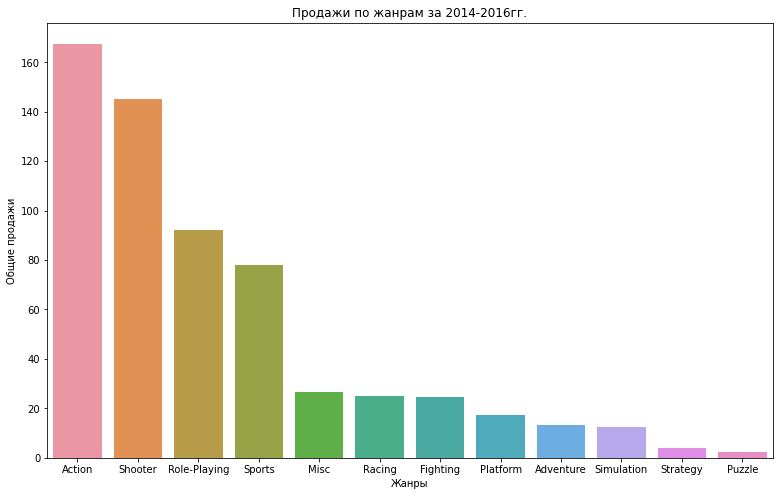

In [ ]:
genre_sales = (
    new_data
    .pivot_table(index='genre', values='sum_region_sales', aggfunc='sum')
    .sort_values('sum_region_sales', ascending=False)
)
plt.figure(figsize=(13,8))
(sns.barplot(data = genre_sales, x=genre_sales.index, y='sum_region_sales')
    .set(title = 'Продажи по жанрам за 2014-2016гг.', xlabel = 'Жанры', ylabel = 'Общие продажи'))
plt.show()

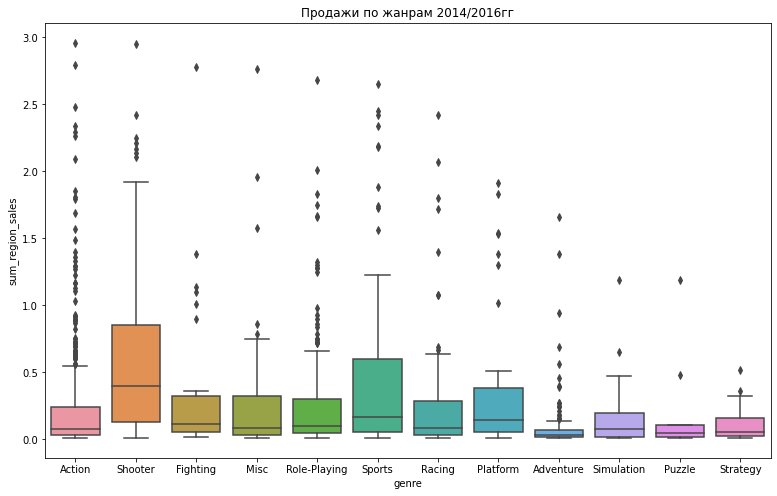

In [ ]:
plt.figure(figsize=(13,8))
(sns.boxplot(data=new_data_filtered, x = 'genre', y = 'sum_region_sales')
    .set(title='Продажи по жанрам 2014/2016гг'))
plt.show() 

**ВЫВОД:** За актуальный период, можно выделить 4 самых популярных жанра:
- Action
- Shooter
- Role_Playing
- Sports

У жанров Action, Music, Fighting, Role-Playing, Racing, Simulation - медианное значение практически на одном уровне ~0.2.

Strategy и Puzzle можно считать самыми непопулярными жанрами.

##  Портрет пользователя каждого региона (NA, EU, JP).

### Топ-5 популярных платформ для каждого региона.

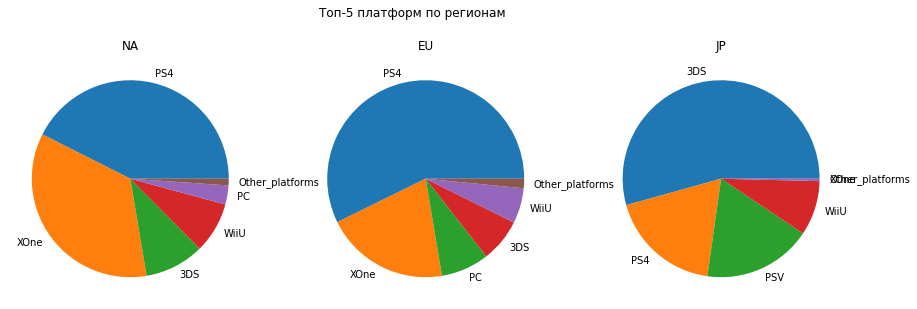

In [ ]:
#Список регионов
regions = new_data.columns[4:7]

fig, axs = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Топ-5 платформ по регионам')
#Функция, для определения 5 самых популярных платформ. Остальные будут выделены в сегмент Other_platforms.
for i in range(3):
    df = (new_data.groupby('platform')[regions[i]].sum().
             reset_index().
             sort_values(regions[i], ascending=False, ignore_index=True).
             head(5))
    df = df.append({'platform': 'Other_platforms', regions[i]: new_data[regions[i]].sum() - df[regions[i]].sum()}, ignore_index=True)
    axs[i].pie(df[regions[i]], labels = df['platform'])
    axs[i].set_title(df.columns[1].split('_')[0].upper())
plt.show()

In [ ]:
#Показала данные в виде таблице:
top_platforms = (new_data.pivot_table(index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
                 .sort_values('eu_sales', ascending=False))
                
top_platforms.head(6)

,eu_sales,jp_sales,na_sales
platform,,,
PS4,130.04,15.02,98.61
XOne,46.25,0.32,81.27
PC,17.97,0.00,7.23
3DS,16.12,44.24,22.64
WiiU,13.15,7.31,19.36
PSV,3.53,14.54,2.52


**Вывод:** В Северной Америке и Европе самая популярная платформа - PS4 и вторая по популярности XOne, а в Японии - 3DS и вторая - PS4. Также, в Японии популярна PSV, по сравнению с другими регионами, и практически не пользуется спросом PC.

### Топ-5 популярных жанров для каждого региона.

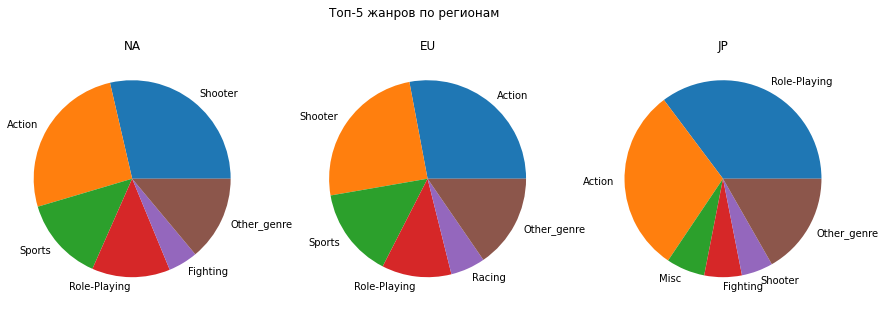

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Топ-5 жанров по регионам')
#Функция, для определения 5 самых популярных жанров. Остальные будут выделены в сегмент Other_genre.
for i in range(3):
    df = (new_data.groupby('genre')[regions[i]].sum().
             reset_index().
             sort_values(regions[i], ascending=False, ignore_index=True).
             head(5))
    df = df.append({'genre': 'Other_genre', regions[i]: new_data[regions[i]].sum() - df[regions[i]].sum()}, ignore_index=True)
    axs[i].pie(df[regions[i]], labels = df['genre'])
    axs[i].set_title(df.columns[1].split('_')[0].upper())
plt.show()

In [ ]:
#Данные в виде табличек:
for i in range(3):
    df = (new_data.groupby('genre')[regions[i]].sum().
             reset_index().
             sort_values(regions[i], ascending=False, ignore_index=True).
             head(5))
    display(df)

,genre,na_sales
0,Shooter,66.29
1,Action,60.16
2,Sports,31.96
3,Role-Playing,29.74
4,Fighting,11.23


,genre,eu_sales
0,Action,63.49
1,Shooter,56.23
2,Sports,33.48
3,Role-Playing,25.94
4,Racing,12.92


,genre,jp_sales
0,Role-Playing,28.70
1,Action,24.71
2,Misc,5.17
3,Fighting,5.01
4,Shooter,4.21


**Вывод:**  В Европе и Северной Америке топ-4 жанров одинаковые, различие только в 5 - в Европе это Racing, в Америке  - Fighting. В Японие же совсем другая картина - лидирует Role-Playing и Action, а с большим отставанием идет Music, Fighting, Shooter.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

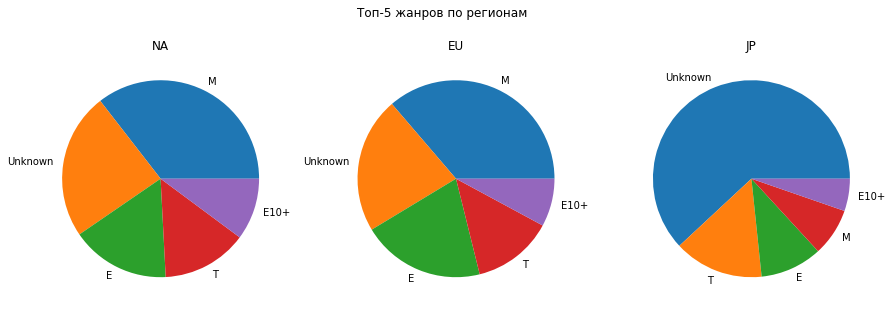

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Топ-5 жанров по регионам')

for i in range(3):
    df = (new_data.groupby('rating')[regions[i]].sum().
             reset_index().
             sort_values(regions[i], ascending=False, ignore_index=True))
    axs[i].pie(df[regions[i]], labels = df['rating'])
    axs[i].set_title(df.columns[1].split('_')[0].upper())
plt.show()

In [ ]:
#Показала данные в виде таблице:
top_platforms = (new_data.pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
                 .sort_values('eu_sales', ascending=False))
                
top_platforms.head()

,eu_sales,jp_sales,na_sales
rating,,,
M,82.38,6.40,82.23
Unknown,50.80,50.43,55.76
E,45.90,8.29,37.65
T,30.09,11.99,32.46
E10+,17.89,4.32,23.53


**Вывод:** Во всех регионах очень большой процент продаж игр с неуказанным рейтингом. По тому что мы имеем, можно сказать, что в Европе и Америке лидируют игры с рейтингом M, в Японии - с рейтингом Т. В Северной Америке игры с рейтингом E и T занимают практически одинаковые доли от продаж. В Европе же, игры с E продаются чуточку больше. И во всех регионах самая маленька доля продаж приходится на игры с рейтингом E10+.

***ОБЩИЙ ВЫВОД ПО БЛОКУ:*** 

*Портрет пользователя из Европы:*

- Самые популярные платформы - PS4 и Xbox One, затем идут в равных долях PC и 3DS.
- Самые популярные жанры - Action, Shooter, Sports, Role-Playing, Racing.
- Самый популярный рейтинг - M

*Портрет пользователя из Северной Америки:*

- Саммые популярные платформы - PS4 и Xone, затем в почти равных долях идут 3DS и WiiU. 
- Самые популярные жанры - Shooter, Action, Sports, Role-Playing, Fighting.
- Самый популярный рейтинг - M. Затем E и T занимают  почти равные доли. 

*Портрет пользователя из Японии:*

- Самая популярная платформа - 3DS. Затем почти одинаковым спросом пользуются PS4 и PSV.
- Самые популярные жанры - Role_Playing, Action, Music, Fighting, Shooter.
- Самые популярный рейтинг - T. Следующий по популярности E и M.





## Проверьте гипотезы.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны.
- Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [ ]:
score = new_data[new_data['user_score'] != -111]

print('Средний пользовательский рейтинг на PC:', score.query('platform == "PC"')['user_score'].mean())
print('Средний пользовательский рейтинг на Xbox One:', score.query('platform == "XOne"')['user_score'].mean())


results = st.ttest_ind(
    score.query('platform == "PC"')['user_score'],
    score.query('platform == "XOne"')['user_score'],
    equal_var=False
    )
alpha = 0.05

print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг на PC: 6.298360655737705
Средний пользовательский рейтинг на Xbox One: 6.594545454545456
p-value: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


Не можем опровергнуть то, что средние пользовательские рейтинги на этих платформах равны.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

- Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны.
- Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

In [ ]:
score = new_data[new_data['user_score'] != -111]

print('Средний пользовательский рейтинг жанра Action:', score.query('genre == "Action"')['user_score'].mean())
print('Средний пользовательский рейтинг жанра Sports:', score.query('genre == "Sports"')['user_score'].mean())


results = st.ttest_ind(
    score.query('genre == "Action"')['user_score'],
    score.query('genre == "Sports"')['user_score'],
    equal_var=False
    )
alpha = 0.05

print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг жанра Action: 6.828163265306123
Средний пользовательский рейтинг жанра Sports: 5.6360465116279075
p-value: 1.1664151897936176e-08
Принимаем альтернативную гипотезу


Средние пользовательские рейтинги жанров Action и Sports различаются.

## Общий вывод:

1) Обнаружено очень много пропусков в столбцах с оценками критиков, пользователей и  с рейтингом. Что делает анализ по этим категориям очень приблизительным.

2) Пропуски в столбцах с оценками заполнила значениями-заглушками(-111), а в столбце с рейтингом - Uknown.

3) Рейтинги объединила в 5 основных категорий:
- E
- M
- T
- E10+
- Uknown

4) Строк-дубликатов не найдено.

5) Удалила строки с пропусками в столбцах name, genre, year_of_release, т.к их около 1.6% от общих данных и их удаление не нанесет ущерба анализу в целом.

6) В 2006-2011 года было выпущено больше всего игр, потом пошло на спад - игр стало выпускаться а разы мeньше.

7) Актуальным периодом выбрала года с 2014 по 2016.

8) В этот период, самыми популярнами платформами являлись - PS4, Xbox One, 3DS, WiiU, PC, PSV. Самыми прибыльными из них - PS4, Xbox One, 3DS, WiiU

9) Замечена слабая корреляция между оценками критиками и продажами на платформах  PS4, Xbox One, WiiU, а также на WiiU обнаружена положительная корреляция между оценками пользователей и продажами.

10) За актуальный период, можно выделить 4 самых популярных жанра:
- Action
- Shooter
- Role_Playing
- Sports

В зависимости от региона распределение по популярности между этими жанрами различается. В Северной Америке и Европе самые востребованные - Action и Shooter, в Японии Role-Playing и Action.

11) В Северной Америке и Европе самыми популярными платформами являются PS4 и Xbox One, а в Японии 3DS, возможно потому что это японская компания.

Итак, при планировании стратегий на будущий год, стоить сделать упор на  такие жанры как Action, Shooter, Role-Playing и Sports. В Северной Америке и Европе  выгоднее всего размещать игры на платформах Xbox One и  PS4, а в Японии же на платформе 3DS и PS4. Так же было бы полезно уделить больше внимания оценкам критиков игр на этих платформах. Поощрать их оставлять комментарии, делиться мнением, потому что есть заметная, хоть и слабая, зависимость между их оценками и продажами игр. 
По имеющимся данным о рейтингах видно, что больше всего продаж игр продается с рейтингом M, т.е для взрослых, а также с рейтингом E и T (для всех и для подростков). Стоит сделать ставку на эти рейтинги.




